In [60]:
!pip install sklearn

In [61]:
import xlrd
import pandas as pd
test=pd.read_excel('./cal_housing.xlsx', header=None)
test.head()

,0
0,"-122.230000,37.880000,41.000000,880.000000,129..."
1,"-122.220000,37.860000,21.000000,7099.000000,11..."
2,"-122.240000,37.850000,52.000000,1467.000000,19..."
3,"-122.250000,37.850000,52.000000,1274.000000,23..."
4,"-122.250000,37.850000,52.000000,1627.000000,28..."


In [62]:
housing=pd.DataFrame(test[0].apply(lambda v: v.split(sep=",")).tolist(),
                    columns=('longitude', 'latitude', 'housingMedianAge', 'totalRooms',
                            'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue'))
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   longitude         20640 non-null  object
 1   latitude          20640 non-null  object
 2   housingMedianAge  20640 non-null  object
 3   totalRooms        20640 non-null  object
 4   totalBedrooms     20640 non-null  object
 5   population        20640 non-null  object
 6   households        20640 non-null  object
 7   medianIncome      20640 non-null  object
 8   medianHouseValue  20640 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


In [63]:
housing = housing.astype(float)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [64]:
# 데이터 확인
housing.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [65]:
#열 totalRoom을 열 households(세대수)로 나눠서 새로운 AvgRooms 열을 생성하자.
housing['AvgRooms'] = housing['totalRooms'].div(housing['households'], axis = 0)

In [66]:
housing.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,AvgRooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853


In [67]:
housing.shape

(20640, 10)

In [68]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
 9   AvgRooms          20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [69]:
# 선형회귀 모델을 이용해 분석 모델 구축
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
Y = housing['medianHouseValue']
X = housing.drop(['medianHouseValue'], axis = 1, inplace = False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)

In [70]:
lr = LinearRegression() #선형 회귀 분석 모델 객체 lr 생성
lr.fit(X_train, Y_train) #training 데이터로 학습 수행
Y_predict = lr.predict(X_test) 

In [71]:
import numpy as np
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 4931897011.667, RMSE : 70227.466
R^2(Variance score) : 0.632


In [72]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  -3724982.099293367
회귀 계수 값:  [-4.42596e+04 -4.40388e+04  1.19850e+03 -9.70000e+00  9.29000e+01
 -3.69000e+01  7.67000e+01  3.95209e+04  2.03410e+03]


In [73]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

medianIncome        39520.87
AvgRooms             2034.06
housingMedianAge     1198.46
totalBedrooms          92.90
households             76.65
totalRooms             -9.68
population            -36.91
latitude           -44038.82
longitude          -44259.59
dtype: float64

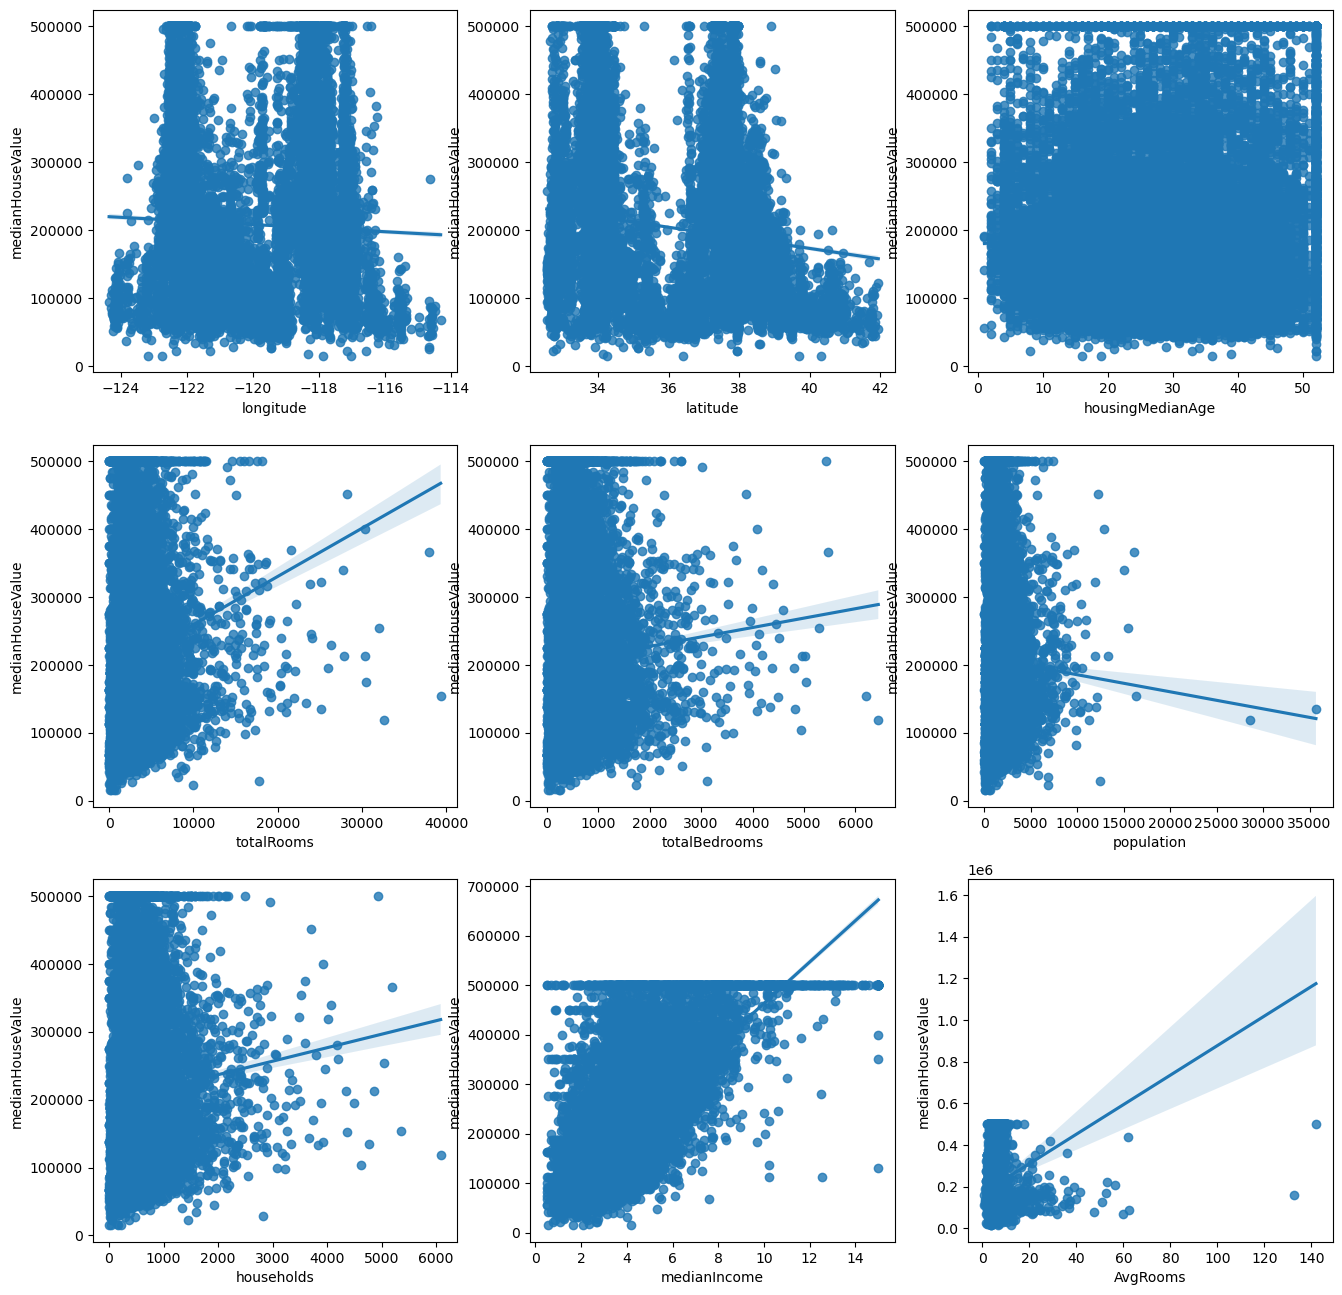

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석 모델 구축 및 시각화
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 3)
x_features =['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms'
,'population','households','medianIncome','AvgRooms']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'medianHouseValue', data = housing, ax = axs[row][col])